In [1]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 2 for only showing errors
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

In [2]:
dataset = pd.read_csv('Monthly_dataset_1.csv')
dataset.head()

,date,Yield,Area Harvested,Aug_prcp (mm),Jul_prcp (mm),Jun_prcp (mm),Sep_prcp (mm),aug_srad (W/m^2),jul_srad (W/m^2),jun_srad (W/m^2),...,jun_tmax (deg c),sep_tmax (deg c),aug_tmin (deg c),jul_tmin (deg c),jun_tmin (deg c),sep_tmin (deg c),aug_vp (Pa),jul_vp (Pa),jun_vp (Pa),sep_vp (Pa)
0,1980-12-31,23252,46390,82.6500,171.1225,97.833621,115.510714,351.994677,360.596048,404.417155,...,21.366552,21.596786,17.206855,15.639113,10.389483,11.532857,1979.333145,1808.963226,1298.384655,1412.074107
1,1981-12-31,23729,47356,95.4500,99.4425,136.272321,155.394828,333.959032,382.391129,376.206250,...,23.856161,19.732069,15.243790,15.842097,13.606429,11.800603,1758.285161,1829.448387,1578.962411,1464.165517
2,1982-12-31,22526,31166,85.6100,40.2000,141.897321,121.150862,362.746210,403.382339,370.001429,...,20.529196,20.184483,13.044113,15.768629,11.623571,10.479310,1545.176694,1819.913710,1383.133750,1301.157500
3,1983-12-31,23689,47159,112.7850,145.5375,65.292857,57.318103,352.762177,361.725726,424.604911,...,25.187589,22.393707,16.415484,16.610242,12.973839,11.948017,1893.806129,1937.883629,1529.818036,1469.525690
4,1984-12-31,21995,40645,89.8275,63.4925,122.322414,122.657143,344.606129,395.069758,389.616638,...,24.401983,19.778750,15.984839,14.366613,13.719741,10.763571,1858.868710,1662.393145,1600.213879,1345.276250


In [3]:
filtered_dataset = dataset.drop(['date'], axis=1)
correlation = filtered_dataset.corr()['Yield']
correlation

Yield               1.000000
Area Harvested     -0.730960
Aug_prcp (mm)      -0.339383
Jul_prcp (mm)      -0.069072
Jun_prcp (mm)      -0.111142
Sep_prcp (mm)      -0.093480
aug_srad (W/m^2)    0.268034
jul_srad (W/m^2)   -0.116643
jun_srad (W/m^2)   -0.170323
sep_srad (W/m^2)    0.458451
aug_tmax (deg c)    0.279663
jul_tmax (deg c)    0.120419
jun_tmax (deg c)    0.296197
sep_tmax (deg c)    0.600611
aug_tmin (deg c)    0.200930
jul_tmin (deg c)    0.271524
jun_tmin (deg c)    0.476035
sep_tmin (deg c)    0.369980
aug_vp (Pa)         0.116737
jul_vp (Pa)         0.318075
jun_vp (Pa)         0.407391
sep_vp (Pa)         0.291852
Name: Yield, dtype: float64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

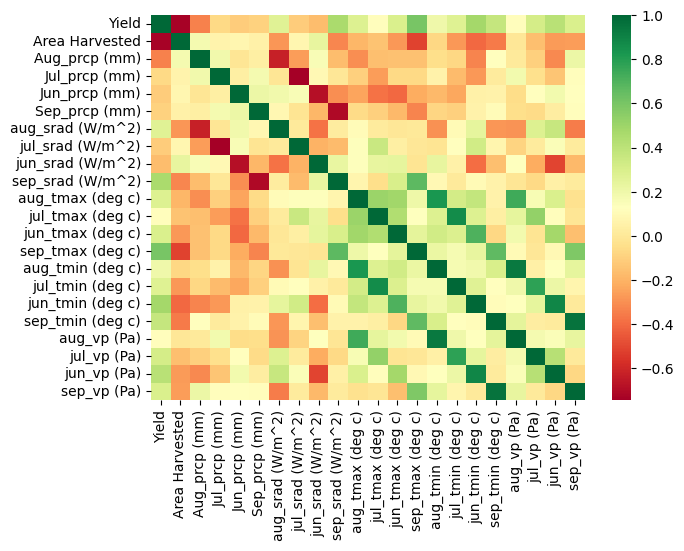

In [5]:
correlation = filtered_dataset.corr()
_, ax = plt.subplots(figsize = (7,5))
_ = sns.heatmap(correlation, ax = ax, cmap = 'RdYlGn', annot = False, fmt = '.1f', annot_kws={"size": 4})

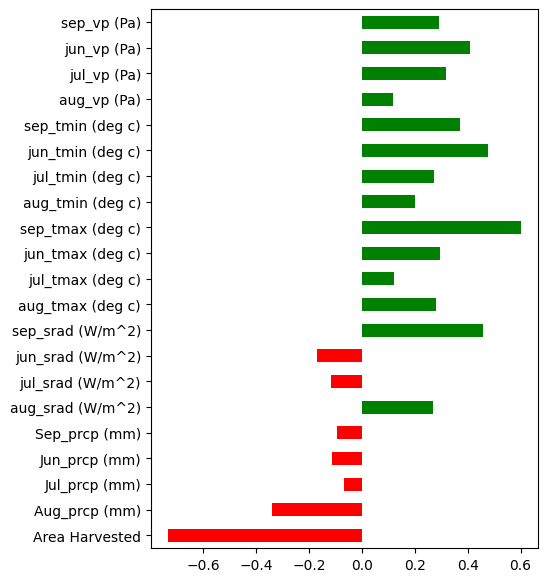

In [6]:
# Correlations
df_corr1 = correlation['Yield'][1:]
list1 = ['green' if x > 0 else 'red' for x in df_corr1]
_ = df_corr1.plot(kind = 'barh', figsize = (5,7), color = list1)

In [7]:
# data = dataset.drop(['Area Harvested'], axis=1)
data = dataset.copy()
data.set_index('date', inplace=True)
data

,Yield,Area Harvested,Aug_prcp (mm),Jul_prcp (mm),Jun_prcp (mm),Sep_prcp (mm),aug_srad (W/m^2),jul_srad (W/m^2),jun_srad (W/m^2),sep_srad (W/m^2),...,jun_tmax (deg c),sep_tmax (deg c),aug_tmin (deg c),jul_tmin (deg c),jun_tmin (deg c),sep_tmin (deg c),aug_vp (Pa),jul_vp (Pa),jun_vp (Pa),sep_vp (Pa)
date,,,,,,,,,,,,,,,,,,,,,
1980-12-31,23252,46390,82.6500,171.1225,97.833621,115.510714,351.994677,360.596048,404.417155,324.127411,...,21.366552,21.596786,17.206855,15.639113,10.389483,11.532857,1979.333145,1808.963226,1298.384655,1412.074107
1981-12-31,23729,47356,95.4500,99.4425,136.272321,155.394828,333.959032,382.391129,376.206250,279.627672,...,23.856161,19.732069,15.243790,15.842097,13.606429,11.800603,1758.285161,1829.448387,1578.962411,1464.165517
1982-12-31,22526,31166,85.6100,40.2000,141.897321,121.150862,362.746210,403.382339,370.001429,288.811983,...,20.529196,20.184483,13.044113,15.768629,11.623571,10.479310,1545.176694,1819.913710,1383.133750,1301.157500
1983-12-31,23689,47159,112.7850,145.5375,65.292857,57.318103,352.762177,361.725726,424.604911,325.372328,...,25.187589,22.393707,16.415484,16.610242,12.973839,11.948017,1893.806129,1937.883629,1529.818036,1469.525690
1984-12-31,21995,40645,89.8275,63.4925,122.322414,122.657143,344.606129,395.069758,389.616638,289.276964,...,24.401983,19.778750,15.984839,14.366613,13.719741,10.763571,1858.868710,1662.393145,1600.213879,1345.276250
1985-12-31,24233,39893,137.6650,76.4275,89.038393,72.561207,341.573548,380.927339,388.413393,319.423707,...,21.334821,22.175431,14.565726,14.818629,10.869554,12.151983,1680.862823,1702.412742,1315.523571,1505.815862
1986-12-31,21572,31298,89.1100,92.7700,98.488393,145.184483,374.865323,369.249677,382.647143,281.891379,...,22.706786,20.469828,13.266694,15.639113,11.972500,10.701983,1577.116048,1810.908226,1436.593839,1344.715259
1987-12-31,20781,29540,119.9275,37.8700,75.500893,70.189655,338.485323,394.473952,375.051071,298.444397,...,25.355357,20.836983,14.686935,17.340000,13.757411,11.718362,1694.318065,1744.795081,1503.840179,1412.375776
1988-12-31,20024,29136,85.7525,172.4800,6.069828,99.875893,341.538145,363.779597,441.621810,294.688661,...,25.293276,20.721429,16.553548,16.354516,11.424483,11.145536,1953.216694,1635.605081,1214.303621,1371.143482


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_Y = MinMaxScaler(feature_range=(0,1))

backup_data = data.copy()

new_data = data.copy()
print(data.shape)

scaled_data = scaler.fit_transform(data)
y_data = np.array(data['Yield']).reshape(-1,1)
print("Y_data shape:",y_data.shape)
scaled_Y = scaler_Y.fit_transform(y_data)
print(scaled_data[0])

(42, 22)
Y_data shape: (42, 1)
[0.36075101 0.97442347 0.47851554 0.79563772 0.45344409 0.39066297
 0.35205212 0.39025107 0.61360867 0.66042394 0.61095266 0.44057186
 0.11330377 0.41239219 0.90846372 0.41595281 0.         0.47290633
 0.88795328 0.61405869 0.14273304 0.4508109 ]


In [10]:
# Step 3: Create a sequence of data by shifting the data by one time step.
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        print(i+1,"th iteration")
        print("X:",data[i:(i + n_steps),:1])
        print('Y:',data[i + n_steps,:])
        print()
        X.append(data[i:(i + n_steps),:])
        y.append(data[i + n_steps,:])
    return np.array(X), np.array(y)

time_steps = 5 # Define the number of time steps in the sequence
sequence_data = scaled_data
X, y = create_sequences(scaled_data, time_steps)

# def create_sequences(data, timesteps):
#     X_train = []
#     Y_train = []

#     timesteps = timesteps
#     n_future  = 1
#     train = data

#     for i in range(timesteps,len(train)-n_future +1):
#         X_train.append(train[i-timesteps:i, 0:train.shape[1]])
#         Y_train.append(train[i + n_future - 1:i + n_future,0])

#     X = np.array(X_train.copy())
#     y = np.array(Y_train.copy())
    
#     return X,y

print(X.shape)
print(y.shape)

1 th iteration
X: [[0.36075101]
 [0.41405901]
 [0.27961556]
 [0.40958873]
 [0.22027269]]
Y: [0.47038444 0.80240409 0.95947895 0.30561844 0.40998311 0.17713023
 0.16611798 0.60202663 0.44740057 0.60648034 0.27807078 0.26470353
 0.10901029 0.50874171 0.33207202 0.19531131 0.08077776 0.58344235
 0.27751043 0.44719163 0.17182747 0.62802362]

2 th iteration
X: [[0.41405901]
 [0.27961556]
 [0.40958873]
 [0.22027269]
 [0.47038444]]
Y: [0.17299955 0.57483651 0.53499148 0.39018616 0.4566796  0.53819251
 0.76011097 0.48038933 0.38751481 0.17604743 0.1813228  0.44294791
 0.29465278 0.22474378 0.0485753  0.41595281 0.26636192 0.32456559
 0.06532358 0.61710472 0.37735216 0.32347336]

3 th iteration
X: [[0.27961556]
 [0.40958873]
 [0.22027269]
 [0.47038444]
 [0.17299955]]
Y: [0.08459991 0.5282904  0.80441054 0.10609452 0.34308854 0.16533955
 0.11101774 0.74313137 0.30862533 0.3658828  0.24816367 0.7463091
 0.65303484 0.28587833 0.35852444 0.87334909 0.56669487 0.50602558
 0.3050296  0.51356595 0.491

In [11]:
y[0]

array([0.47038444, 0.80240409, 0.95947895, 0.30561844, 0.40998311,
       0.17713023, 0.16611798, 0.60202663, 0.44740057, 0.60648034,
       0.27807078, 0.26470353, 0.10901029, 0.50874171, 0.33207202,
       0.19531131, 0.08077776, 0.58344235, 0.27751043, 0.44719163,
       0.17182747, 0.62802362])

In [12]:
scaled_data[5,0]

0.4703844434510507

## Model LSTM/

In [13]:
import keras
import keras.backend as K

def r2_Keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from keras.callbacks import *
from keras.layers import *
from keras.models import *

In [15]:
# def model1(x=X, units1=1, units2=1, activ='relu'):
#     model = Sequential()
#     model.add(LSTM(units1, activation=activ, input_shape=x.shape[1:]))
#     model.add(Dense(units2,activation=activ))
#     model.add(Dense(1, activation='linear'))
    
#     return model

# def model2(x=X, units1=1, units2=1, activ='relu'):
#     model = Sequential()
#     model.add(GRU(units1, activation=activ, input_shape=x.shape[1:]))
#     model.add(Dense(units2,activation=activ))
#     model.add(Dense(1, activation='linear'))
    
#     return model

# def model3(x=X, units1=1, units2=1, activ='relu'):
#     model = Sequential()
#     model.add(Conv1D(32, kernel_size=3, activation=activ, input_shape=x.shape[1:]))
#     model.add(LSTM(units1, activation=activ))
#     model.add(Flatten())
#     model.add(Dense(units2,activation=activ))
#     model.add(Dense(1, activation='linear'))
    
#     return model



In [16]:
print(y.shape)

(37, 22)


In [ ]:
from itertools import product

best_score = float('inf')
# # best_score = -9999
# best_hyperparameters = {}

# Step 3: Create a sequence of data by shifting the data by one time step.
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps),:])
        y.append(data[i + n_steps,:])
        
    return np.array(X), np.array(y)

def create_model_lstm(x, y, unitsconv, unitslstm, unitsdense , activate, optime, lr, loss, batch, epoch):    
    # Model 1 - 5
    features = y.shape[-1]
    model2 = keras.models.Sequential()
    model2.add(keras.layers.Conv1D(32, kernel_size=3, activation = activate, input_shape=x.shape[1:]))
    model2.add(keras.layers.LSTM(unitsconv, activation=activate, return_sequences=True))
    model2.add(keras.layers.GRU(unitslstm, activation=activate))
    model2.add(keras.layers.Flatten())
    model2.add(keras.layers.Dense(unitsdense, activation=activate))
    model2.add(keras.layers.Dense(features, activation='linear'))
    
    print("\n\n")
    model2.summary()
    print("\n")    
    def r2_Keras(y_true, y_pred):
        SS_res =  K.sum(K.square( y_true-y_pred ))
        SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
        return ( 1 - SS_res/(SS_tot + K.epsilon()) )
    
    model2.compile(optimizer = optime(lr), loss=loss, metrics=[r2_Keras, 'mape'])    
    
    batch = int(batch)
    epoch = int(epoch)
    callback = ModelCheckpoint(filepath='Models/checkpoint/Model10_checkpoint.hdf5',
                              monitor='r2_Keras', mode='max', save_best_only=True, save_weights_only=True,
                              verbose=False)
    
    history = model2.fit(x, y,
                       batch_size = batch,
                       epochs = epoch,
                       verbose = 0,
                        callbacks=[callback],
                       shuffle = False)
    
    return model2, history

# Define hyperparameter search space
# models = [model1(), model2(), model3()]
timesteps = [4, 5] #TimeSteps for Data
unitsconv_list = [32, 64, 128]
unitslstm_list = [32, 64, 128] # Number of LSTM Units
unitsdense_list = [16, 32, 64] # Number of Dense units
activate_list = ['relu', 'selu'] # Activation Function
batch_size_list = [4, 8, 16] # Batch Size
learning_rate_list = [0.005, 0.001, 0.0005, 0.0001,] # Learning Rate
optimizer_list = [keras.optimizers.Adamax] # Optimizer 
loss_list = ['mse'] # Loss Function
epoch_list = [80, 100]

Full_list = product(timesteps, unitsconv_list, unitslstm_list, unitsdense_list, activate_list, batch_size_list, learning_rate_list, optimizer_list, loss_list, epoch_list)
print("Iterations :",len(list(Full_list)))
X_train, X_test, y_train, y_test = 0,0,0,0

# Iterate through all combinations of hyperparameters
for steps, convs, i, j, k, l, m, n, o, p in product(timesteps, unitsconv_list, unitslstm_list, unitsdense_list, activate_list, batch_size_list, learning_rate_list, optimizer_list, loss_list, epoch_list):
    X, y = create_sequences(scaled_data, steps)
#     print("X.shape:",X.shape)
#     print("Y.shape:",y.shape)
    X_train = X[:-9]
    y_train = y[:-9]
    X_test = X[-9:]
    y_test = y[-9:]
    
    print(steps, i, j, k, l, m, n, o, p)
    model3, history = create_model_lstm(x=X_train, y=y_train,
                                        unitsconv=convs,
                                        unitslstm=i, unitsdense=j,
                                        activate=k, batch=l, lr=m, optime=n, loss=o, epoch=p)    
    
    
    
    model3.load_weights("Models/checkpoint/Model10_checkpoint.hdf5")
    y_pred1 = model3.predict(X_test)
    print(y_pred1.shape)
#     y_pred2 = scaler.inverse_transform(y_pred1.reshape(-1, 1))
    y_pred2 = scaler.inverse_transform(y_pred1)
#     print(y_pred2.shape)
#     print(y_pred2)
    y_true1 = y_test
    y_true2 = scaler.inverse_transform(y_true1)
    score = mean_absolute_percentage_error(y_pred=y_pred2, y_true=y_true2)
    print("Fit Complete for:", steps, convs, i, j, k, l, m, n, o, p)
    print("\n\nCurrent Score:", score)
    
    # Update best hyperparameters if the current score is better
    if score < best_score:
        best_score = score
        best_hyperparameters = {"TimeSteps":steps, 'unitsconv':convs, 'unitslstm': i, 'unitsdense': j, 'activate': k, 'batch': l, 'Optimizer': n, 'learning_rate': m, 'lossFunction': o, 'Epochs':p}
        print("\n\nNew Best Score:", score, "Hyperparameters:", (steps, convs, i, j, k, l, m, n, o, p))
        print(r2_score(y_pred=y_pred2, y_true=y_true2))
        model3.save('Models/Model10.hdf5')
        model3.save_weights("Models/Model10_weights.hdf5")

print("\n\nBest Hyperparameters:", best_hyperparameters)
print("Best Score:", best_score)


Iterations : 2592
4 32 16 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 32)             2144      
                                                                 
 lstm (LSTM)                 (None, 2, 32)             8320      
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 22)                374       
                       

(9, 22)
Fit Complete for: 4 32 32 16 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.17862279753230612
4 32 16 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 2, 32)             2144      
                                                                 
 lstm_5 (LSTM)               (None, 2, 32)             8320      
                                                                 
 gru_5 (GRU)                 (None, 32)                6336      
                                                                 
 flatten_5 (Flatten)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                            

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 2, 32)             2144      
                                                                 
 lstm_10 (LSTM)              (None, 2, 32)             8320      
                                                                 
 gru_10 (GRU)                (None, 32)                6336      
                                                                 
 flatten_10 (Flatten)        (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 22)                374       
                                                                 
Total params: 17,702
Trainable params: 17,702
Non-trainable params: 0
______

                                                                 
 dense_31 (Dense)            (None, 22)                374       
                                                                 
Total params: 17,702
Trainable params: 17,702
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 161ms/step
(9, 22)
Fit Complete for: 4 32 32 16 relu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.1902496239105578
4 32 16 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_16 (Conv1D)          (None, 2, 32)             2144      
                                                                 
 lstm_16 (LSTM)              (None, 2, 32)             8320      
                                   

 Layer (type)                Output Shape              Param #   
 conv1d_21 (Conv1D)          (None, 2, 32)             2144      
                                                                 
 lstm_21 (LSTM)              (None, 2, 32)             8320      
                                                                 
 gru_21 (GRU)                (None, 32)                6336      
                                                                 
 flatten_21 (Flatten)        (None, 32)                0         
                                                                 
 dense_42 (Dense)            (None, 16)                528       
                                                                 
 dense_43 (Dense)            (None, 22)                374       
                                                                 
Total params: 17,702
Trainable params: 17,702
Non-trainable params: 0
_________________________________________________________________


1/1 

                                                                 
 dense_53 (Dense)            (None, 22)                374       
                                                                 
Total params: 17,702
Trainable params: 17,702
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 176ms/step
(9, 22)
Fit Complete for: 4 32 32 16 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.17022399390244217
4 32 16 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_27 (Conv1D)          (None, 2, 32)             2144      
                                                                 
 lstm_27 (LSTM)              (None, 2, 32)             8320      
                                    

_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_32 (Conv1D)          (None, 2, 32)             2144      
                                                                 
 lstm_32 (LSTM)              (None, 2, 32)             8320      
                                                                 
 gru_32 (GRU)                (None, 32)                6336      
                                                                 
 flatten_32 (Flatten)        (None, 32)                0         
                                                                 
 dense_64 (Dense)            (None, 16)                528       
                                                                 
 dense_65 (Dense)            (None, 22)                374       
                                                                 
Total params: 17,702
Trainable params: 17,702
Non-trainable params: 0
______

                                                                 
 lstm_37 (LSTM)              (None, 2, 32)             8320      
                                                                 
 gru_37 (GRU)                (None, 32)                6336      
                                                                 
 flatten_37 (Flatten)        (None, 32)                0         
                                                                 
 dense_74 (Dense)            (None, 16)                528       
                                                                 
 dense_75 (Dense)            (None, 22)                374       
                                                                 
Total params: 17,702
Trainable params: 17,702
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 164ms/step
(9, 22)
Fit Complete for: 4 32 32 16 selu 8 0.0005 <class 'keras.optimizers.legacy.

Total params: 17,702
Trainable params: 17,702
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 163ms/step
(9, 22)
Fit Complete for: 4 32 32 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.183378933024724
4 32 16 selu 16 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_43 (Conv1D)          (None, 2, 32)             2144      
                                                                 
 lstm_43 (LSTM)              (None, 2, 32)             8320      
                                                                 
 gru_43 (GRU)                (None, 32)                6336      
                                                                 
 flatten_43 (Flatten)        (None, 

                                                                 
 lstm_48 (LSTM)              (None, 2, 32)             8320      
                                                                 
 gru_48 (GRU)                (None, 32)                6336      
                                                                 
 flatten_48 (Flatten)        (None, 32)                0         
                                                                 
 dense_96 (Dense)            (None, 32)                1056      
                                                                 
 dense_97 (Dense)            (None, 22)                726       
                                                                 
Total params: 18,582
Trainable params: 18,582
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 167ms/step
(9, 22)
Fit Complete for: 4 32 32 32 relu 4 0.005 <class 'keras.optimizers.legacy.a

Total params: 18,582
Trainable params: 18,582
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 179ms/step
(9, 22)
Fit Complete for: 4 32 32 32 relu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.18116691452206743
4 32 32 relu 4 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_54 (Conv1D)          (None, 2, 32)             2144      
                                                                 
 lstm_54 (LSTM)              (None, 2, 32)             8320      
                                                                 
 gru_54 (GRU)                (None, 32)                6336      
                                                                 
 flatten_54 (Flatten)        (None

 lstm_59 (LSTM)              (None, 2, 32)             8320      
                                                                 
 gru_59 (GRU)                (None, 32)                6336      
                                                                 
 flatten_59 (Flatten)        (None, 32)                0         
                                                                 
 dense_118 (Dense)           (None, 32)                1056      
                                                                 
 dense_119 (Dense)           (None, 22)                726       
                                                                 
Total params: 18,582
Trainable params: 18,582
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 165ms/step
(9, 22)
Fit Complete for: 4 32 32 32 relu 8 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.17235561325207727
4 32 3

Total params: 18,582
Trainable params: 18,582
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
(9, 22)
Fit Complete for: 4 32 32 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.1824433069026859
4 32 32 relu 16 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_65 (Conv1D)          (None, 2, 32)             2144      
                                                                 
 lstm_65 (LSTM)              (None, 2, 32)             8320      
                                                                 
 gru_65 (GRU)                (None, 32)                6336      
                                                                 
 flatten_65 (Flatten)        (None,

 lstm_70 (LSTM)              (None, 2, 32)             8320      
                                                                 
 gru_70 (GRU)                (None, 32)                6336      
                                                                 
 flatten_70 (Flatten)        (None, 32)                0         
                                                                 
 dense_140 (Dense)           (None, 32)                1056      
                                                                 
 dense_141 (Dense)           (None, 22)                726       
                                                                 
Total params: 18,582
Trainable params: 18,582
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 177ms/step
(9, 22)
Fit Complete for: 4 32 32 32 relu 16 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.25147856685409614
4 32 

Trainable params: 18,582
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 171ms/step
(9, 22)
Fit Complete for: 4 32 32 32 selu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.16483239218578996
4 32 32 selu 4 0.0005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_76 (Conv1D)          (None, 2, 32)             2144      
                                                                 
 lstm_76 (LSTM)              (None, 2, 32)             8320      
                                                                 
 gru_76 (GRU)                (None, 32)                6336      
                                                                 
 flatten_76 (Flatten)        (None, 32)                0

 lstm_81 (LSTM)              (None, 2, 32)             8320      
                                                                 
 gru_81 (GRU)                (None, 32)                6336      
                                                                 
 flatten_81 (Flatten)        (None, 32)                0         
                                                                 
 dense_162 (Dense)           (None, 32)                1056      
                                                                 
 dense_163 (Dense)           (None, 22)                726       
                                                                 
Total params: 18,582
Trainable params: 18,582
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 168ms/step
(9, 22)
Fit Complete for: 4 32 32 32 selu 8 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.15461006556855741
4 32 3

                                                                 
Total params: 18,582
Trainable params: 18,582
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 170ms/step
(9, 22)
Fit Complete for: 4 32 32 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80


Current Score: 0.20770894332828835
4 32 32 selu 8 0.0001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100



Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_87 (Conv1D)          (None, 2, 32)             2144      
                                                                 
 lstm_87 (LSTM)              (None, 2, 32)             8320      
                                                                 
 gru_87 (GRU)                (None, 32)                6336      
                                  

 conv1d_92 (Conv1D)          (None, 2, 32)             2144      
                                                                 
 lstm_92 (LSTM)              (None, 2, 32)             8320      
                                                                 
 gru_92 (GRU)                (None, 32)                6336      
                                                                 
 flatten_92 (Flatten)        (None, 32)                0         
                                                                 
 dense_184 (Dense)           (None, 32)                1056      
                                                                 
 dense_185 (Dense)           (None, 22)                726       
                                                                 
Total params: 18,582
Trainable params: 18,582
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 188ms/step
(9, 22)
Fit Compl

                                                                 
Total params: 20,342
Trainable params: 20,342
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 173ms/step
(9, 22)
Fit Complete for: 4 32 32 64 relu 4 0.005 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 100


Current Score: 0.157911205135571
4 32 64 relu 4 0.001 <class 'keras.optimizers.legacy.adamax.Adamax'> mse 80



Model: "sequential_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_98 (Conv1D)          (None, 2, 32)             2144      
                                                                 
 lstm_98 (LSTM)              (None, 2, 32)             8320      
                                                                 
 gru_98 (GRU)                (None, 32)                6336      
                                      

    New Best Score: 0.0049161988386506456 Hyperparameters: (4, 32, 32, 'selu', 8, 0.005, <class 'keras.optimizers.legacy.adam.Adam'>, 'mse', 50)
    32 32 selu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100

    Best Hyperparameters: {'TimeSteps': 4, 'unitslstm': 128, 'unitsdense': 64, 'activate': 'selu', 'batch': 16, 'Optimizer': <class 'keras.optimizers.legacy.adamax.Adamax'>, 'learning_rate': 0.0005, 'lossFunction': 'mse', 'Epochs': 100}
    Best Score: 0.062239476158687135

In [20]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps), :])
        y.append(data[i + n_steps, :])
    return np.array(X), np.array(y)

X,y = create_sequences(scaled_data, 4)
print("X.shape:",X.shape)
print("y.shape:",y.shape)
X_train = X[:-9]
y_train = y[:-9]
X_test = X[-9:]
y_test = y[-9:]

def finalize_lstm(unitslstm, unitsdense , activate):    
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(unitslstm, activation=activate, input_shape=X.shape[1:]))
    model.add(keras.layers.Dense(unitsdense,activation=activate))
    model.add(keras.layers.Dense(1,activation='linear'))
    
    return model

model = finalize_lstm(unitslstm=128, unitsdense=64, activate='selu')
model.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.0005), loss='mse', metrics=['mape'])
model.load_weights('Models/Model10_weights.hdf5')
model.summary()

X.shape: (38, 4, 22)
y.shape: (38, 22)


ValueError: Cannot assign value to variable ' dense_1947/kernel:0': Shape mismatch.The variable shape (64, 1), and the assigned value shape (64, 22) are incompatible.

In [20]:
# new_X = X[-4:]
# new_y = y[-4:]
# X = X[:-4]
# y = y[:-4]

In [21]:
# model.fit(X, y, batch_size=4, shuffle=False, epochs=50)

In [18]:
y_pred = model.predict(X[-9:], batch_size=16)
y_pred_inv = scaler_Y.inverse_transform(y_pred)
y_pred_inv.shape

NameError: name 'model' is not defined

In [27]:
y_true = y[-9:]
y_true_inv = scaler_Y.inverse_transform(y_true)
y_true_inv.shape

(9, 22)

In [28]:
score = mean_absolute_percentage_error(y_pred=y_pred_inv,y_true=y_true_inv)
score

ValueError: y_true and y_pred have different number of output (22!=1)

In [23]:
score = r2_score(y_pred=y_pred_inv, y_true=y_true_inv)
score

0.979805195241059

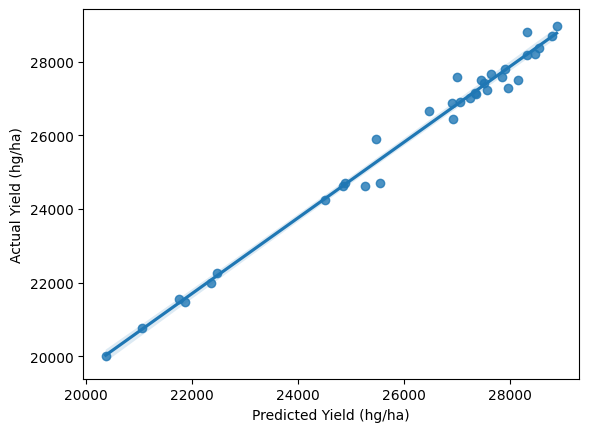

In [24]:
sns.regplot(x=y_pred_inv, y=y_true_inv)
plt.xlabel('Predicted Yield (hg/ha)')
plt.ylabel('Actual Yield (hg/ha)')
plt.show()

### Forecasting

In [25]:
#  Step 1: Prepare the last time_steps data points from your original dataset
# last_data_points = scaled_data[-time_steps:]
last_data_points = scaled_data
print(last_data_points.shape)
future_yields = []

# def create_sequences(data, n_steps):
#     X, y = [], []
#     for i in range(len(data) - n_steps):
#         X.append(data[i:(i + n_steps),:])
#         y.append(data[i + n_steps,:1])
#     return np.array(X), np.array(y)

# time_steps = 4 # Define the number of time steps in the sequence
# sequence_data = scaled_data
# X, y = create_sequences(scaled_data, time_steps)
print("X.shape",X.shape)
print("Y.shape",y.shape)

last_data_points = X[-1]
print("last_data_points Shape:",last_data_points.shape)
future_yields = []

def finalize_lstm(unitslstm=32, unitsdense=32 , activate='selu'):
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(unitslstm, activation=activate, input_shape=X.shape[1:]))
    model.add(keras.layers.Dense(unitsdense,activation=activate))
    model.add(keras.layers.Dense(1,activation='linear'))
    
    return model
    

model = finalize_lstm()
model.compile(optimizer=keras.optimizers.Adamax(learning_rate=0.005), loss='mse', metrics=['mape'])
model.load_weights('Models/Model5_weights.hdf5')
model.summary()



(42, 22)
X.shape (34, 4, 22)
Y.shape (34, 1)
last_data_points Shape: (4, 22)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                7040      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Step 3: Forecast the yield for the future without having future X values
num_future_steps = 5
time_steps = 4

for i in range(num_future_steps):
    # Reshape the last_data_points to match the model's input shape
    print("LastDataPoints Shape:",last_data_points.shape)
    df_X = last_data_points[-time_steps:]
#     print(df_X)
    print("DF Shape:",df_X.shape)
    X_pred = df_X.reshape(1, time_steps, df_X.shape[1])
    print("X_pred shape:",X_pred.shape)

    # Use the trained model to make a prediction
    predicted_yield1 = model.predict(X_pred)
    pred = predicted_yield1[0, 0]
    print("pred shape:",pred.shape)

    # Inverse transform the predicted yield to get the original scale and extract the scalar value
    predicted_yield = scaler_Y.inverse_transform(predicted_yield1)[0, 0]
    future_yields.append(predicted_yield)
#     print(predicted_yield)
    print("InvTrans Shape:",predicted_yield.shape)

    # Append the predicted yield to the last_data_points for the next prediction
    last_data_points = np.append(last_data_points, [np.concatenate(([pred], df_X[-1, 1:]))], axis=0)
#     print(last_data_points[-time_steps:])
    print("NP Concat shape:",np.concatenate(([pred], df_X[-1, 1:])).shape)
    print("LastDataPoints:",last_data_points[-time_steps:].shape)

# Step 4: Inverse transform the entire forecasted data to get the original scale
forecasted_yield = scaler.inverse_transform(last_data_points)

print(last_data_points.shape)

# The forecasted_yield will contain the predicted yield values for the future time steps
# print("Forecasted Yields: ",np.round(future_yields))

print(forecasted_yield[-num_future_steps:,0])

LastDataPoints Shape: (4, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 106ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (5, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 13ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (6, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 14ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (7, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 13ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (8, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 13ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape:

In [27]:
scaled_new_y = scaler_Y.inverse_transform(new_y)
scaled_new_y

array([[28416.],
       [28321.],
       [28367.],
       [28368.]])

In [ ]:
absolute_erro

In [36]:
print(percentage_error(y_pred=forecasted_yield[-num_future_steps:,0][:4], y_true=scaled_new_y)*100)

NameError: name 'percentage_error' is not defined

In [29]:
print(X.shape)
pred = model.predict(X)
scaled_pred = y_pred_inv
y1 = y_true_inv
diff = y1 - scaled_pred
diff

(34, 4, 22)
2/2 [==============================] - 0s 2ms/step


array([[-369.69335938],
       [-274.04296875],
       [-177.46484375],
       [-280.69140625],
       [-351.33007812],
       [-182.68554688],
       [-385.9921875 ],
       [ 446.75      ],
       [-641.79492188],
       [-224.34375   ],
       [-162.54101562],
       [ 604.06054688],
       [-657.515625  ],
       [-249.44726562],
       [-465.20507812],
       [-102.28320312],
       [-205.53125   ],
       [-842.43554688],
       [ 486.22460938],
       [  97.78125   ],
       [-208.48046875],
       [ -34.71875   ],
       [-188.625     ],
       [ 198.2109375 ],
       [-337.2890625 ],
       [  50.83203125],
       [ -75.76171875],
       [-630.546875  ],
       [-246.66992188],
       [  36.02929688],
       [-258.33203125],
       [ -74.16015625],
       [-133.1015625 ],
       [-176.02539062]])

[datetime.date(2017, 12, 31) datetime.date(2018, 12, 31)
 datetime.date(2019, 12, 31) datetime.date(2020, 12, 31)
 datetime.date(2021, 12, 31)]
[22364, 24507, 21749, 21061, 20375, 24879, 21875, 25465, 25270, 24844, 27056, 26993, 27952, 27360, 26916, 27892, 22478, 25545, 28316, 28874, 27233, 26909, 27334, 26468, 27561, 27453, 27508, 28145, 27842, 27641, 28463, 28784, 28318, 28539]


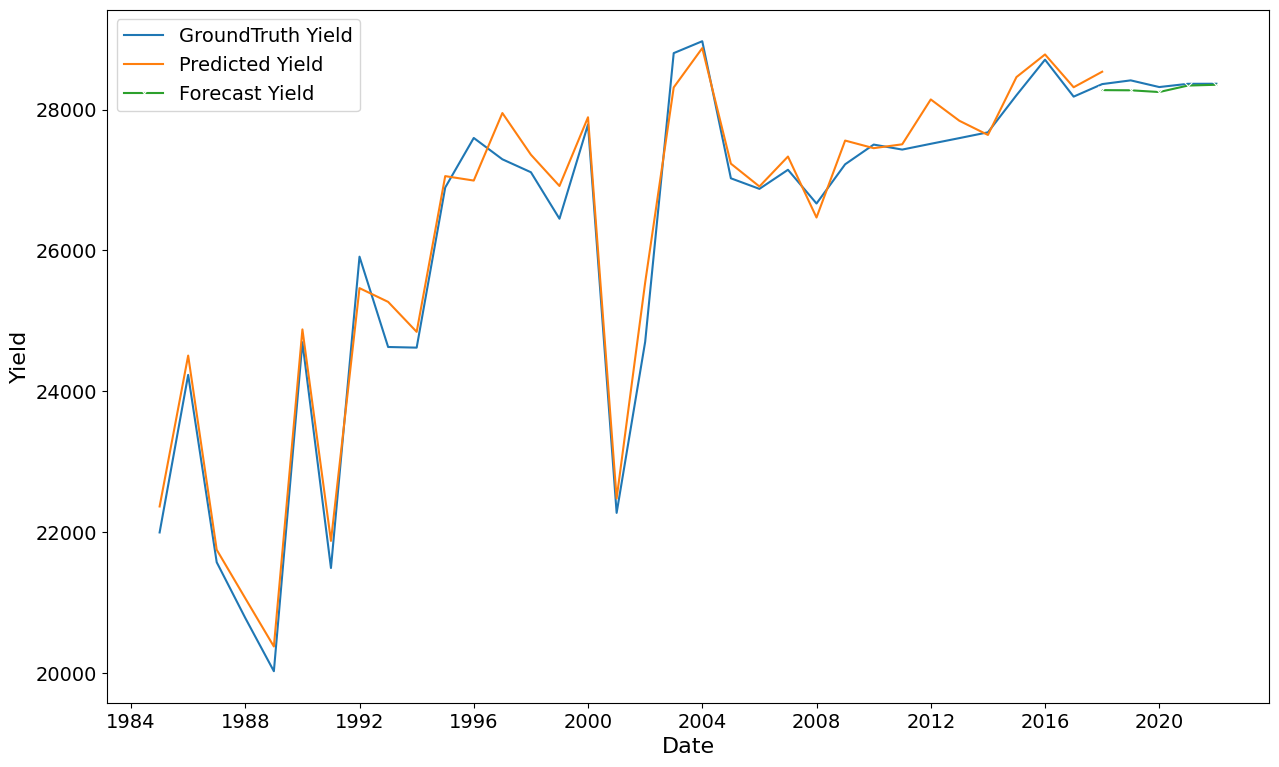

In [34]:
import matplotlib.pyplot as plt
date_range = pd.date_range(start='2017-12-31', periods=len(future_yields), freq='A-DEC')
date_range = date_range.date
print(date_range)

dataset = pd.read_csv("Monthly_dataset_1.csv")

new_data = pd.DataFrame({'date':date_range, 'Yield':future_yields})
existing_data =pd.DataFrame({'date':dataset['date'], 'Yield':dataset['Yield']})

appended_data = pd.concat([existing_data,new_data], ignore_index=True)

date_known = pd.to_datetime(dataset['date'][time_steps:])
y_predict = [int(i) for i in scaled_pred]
print(y_predict)
y_known = dataset['Yield'][time_steps:]
date_forecast = pd.to_datetime(date_range)
y_forecast = future_yields
y_actual_forecast = [int(i) for i in scaled_new_y]


# plt.figure(figsize=(15, 9))
# sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield",)  # Add markers to the GroundTruth line
# sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
# # sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
# plt.show()


plt.figure(figsize=(15, 9))
sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield")  # Add markers to the GroundTruth line
sns.lineplot(x=date_known[:-4], y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x', )  # Add markers to the Forecast line
# sns.lineplot(x=date_forecast[:4], y=y_actual_forecast, label="Real Yield at forecast", markers='x--')
plt.xlabel('Date', fontsize=16)  # Increase x-axis label font size
plt.ylabel('Yield', fontsize=16)  # Increase y-axis label font size
plt.xticks(fontsize=14)  # Increase x-axis tick label font size
plt.yticks(fontsize=14)  # Increase y-axis tick label font size
plt.legend(fontsize=14)  # Increase legend font size
# plt.grid()
# plt.show()
plt.savefig("Yield_Model5_4year.png")

In [30]:
model.save("Models/Transfer_learned/Model5.hdf5")
model.save_weights("Models/Transfer_learned/Model5-Weights.hdf5")

    Best Hyperparameters: {'TimeSteps': 5,
    'unitslstm': 64,
    'unitsdense': 64,
    'activate': 'relu',
    'batch': 16,
    'Optimizer': <class 'keras.optimizers.legacy.adamax.Adamax'>,
    'learning_rate': 0.0005, 'lossFunction': 'mse', 'Epochs': 120}
    Best Score: 0.0053880662259232735
    
    
    New Best Score: 0.0049161988386506456 Hyperparameters: (4, 32, 32, 'selu', 8, 0.005, <class 'keras.optimizers.legacy.adam.Adam'>, 'mse', 50)
    32 32 selu 8 0.005 <class 'keras.optimizers.legacy.adam.Adam'> mse 100

### MISC ****************************************************************

In [16]:
X.shape

(37, 5, 22)

In [17]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:(i + n_steps),:])
        y.append(data[i + n_steps,:1])
    return np.array(X), np.array(y)

X,y = create_sequences(scaled_data, 4)
print("X.shape:",X.shape)
print("y.shape:",y.shape)
X_train = X[:-9]
y_train = y[:-9]
X_test = X[-9:]
y_test = y[-9:]

def finalize_lstm(unitslstm, unitsdense , activate):    
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(unitslstm, activation=activate, input_shape=X.shape[1:]))
    model.add(keras.layers.Dense(unitsdense,activation=activate))
    model.add(keras.layers.Dense(1,activation='linear'))
    
    return model

model = finalize_lstm(unitslstm=32, unitsdense=32, activate='selu')
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss='mse', metrics=['mape'])
model.load_weights('Models/Model5_weights.hdf5')
model.summary()

X.shape: (38, 4, 22)
y.shape: (38, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                7040      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X, y, batch_size=8, shuffle=False, epochs=50)

Epoch 1/50
5/5 [==============================] - 1s 2ms/step - loss: 0.0971 - mape: 7124902.5000
Epoch 2/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0680 - mape: 12641807.0000
Epoch 3/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0197 - mape: 4337588.0000
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0355 - mape: 9862698.0000
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0233 - mape: 4159080.5000
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0224 - mape: 3836522.5000
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0198 - mape: 4611708.5000
Epoch 8/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0194 - mape: 2103233.5000
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0185 - mape: 5149697.0000
Epoch 10/50
5/5 [==============================] - 0s 2ms/step - loss: 0.0166 - mape: 3222185.7500
Epoch 11/50
5/5 [=

In [19]:
y_pred = model.predict(X[:], batch_size=8)
y_pred_inv = scaler_Y.inverse_transform(y_pred)
y_pred_inv.shape

5/5 [==============================] - 0s 955us/step


(38, 1)

In [20]:
y_true = y[:]
y_true_inv = scaler_Y.inverse_transform(y_true)
y_true_inv.shape

(38, 1)

In [21]:
score = mean_absolute_percentage_error(y_pred=y_pred_inv,y_true=y_true_inv)
score

0.013458120672198811

In [22]:
score = r2_score(y_pred=y_pred_inv, y_true=y_true_inv)
score

0.968183062205816

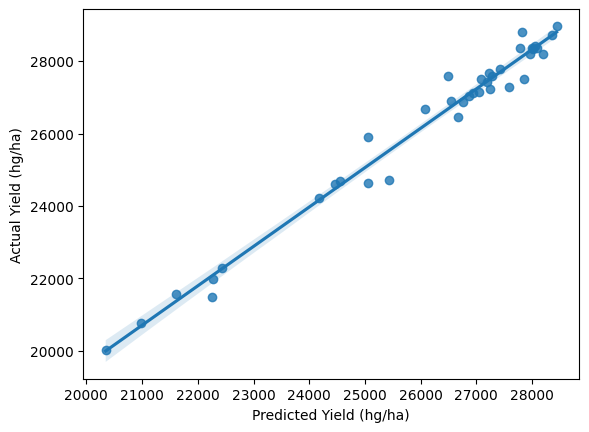

In [23]:
sns.regplot(x=y_pred_inv, y=y_true_inv)
plt.xlabel('Predicted Yield (hg/ha)')
plt.ylabel('Actual Yield (hg/ha)')
plt.show()

In [24]:
# Difference :

diff = y_true_inv - y_pred_inv
diff

array([[-269.87695312],
       [  51.72070312],
       [ -30.45117188],
       [-198.69140625],
       [-323.08789062],
       [ 153.265625  ],
       [-767.00585938],
       [ 858.10742188],
       [-433.703125  ],
       [ 156.90429688],
       [ 348.0625    ],
       [1115.40820312],
       [-283.73632812],
       [ 175.015625  ],
       [-220.25390625],
       [ 367.70703125],
       [-166.68554688],
       [-731.828125  ],
       [ 991.20703125],
       [ 531.77734375],
       [ 154.46875   ],
       [ 123.02734375],
       [  94.61523438],
       [ 585.92773438],
       [ -28.1640625 ],
       [ 429.71289062],
       [ 244.41992188],
       [-336.85742188],
       [ 323.99414062],
       [ 454.39453125],
       [   2.65234375],
       [ 344.64648438],
       [ 225.8046875 ],
       [ 281.92773438],
       [ 367.53125   ],
       [ 299.97265625],
       [ 587.09375   ],
       [ 376.29296875]])

#### Future Forecast

In [25]:
#  Step 1: Prepare the last time_steps data points from your original dataset
# last_data_points = scaled_data[-time_steps:]
last_data_points = scaled_data
print(last_data_points.shape)
future_yields = []

# def create_sequences(data, n_steps):
#     X, y = [], []
#     for i in range(len(data) - n_steps):
#         X.append(data[i:(i + n_steps),:])
#         y.append(data[i + n_steps,:1])
#     return np.array(X), np.array(y)

# time_steps = 4 # Define the number of time steps in the sequence
# sequence_data = scaled_data
# X, y = create_sequences(scaled_data, time_steps)
print("X.shape",X.shape)
print("Y.shape",y.shape)

last_data_points = X[-1]
print("last_data_points Shape:",last_data_points.shape)
future_yields = []

def finalize_lstm(unitslstm, unitsdense , activate):    
    model = keras.models.Sequential()
    model.add(keras.layers.LSTM(unitslstm, activation=activate, input_shape=X.shape[1:]))
    model.add(keras.layers.Dense(unitsdense,activation=activate))
    model.add(keras.layers.Dense(1,activation='linear'))
    
    return model

model = finalize_lstm(unitslstm=32, unitsdense=32, activate='selu')
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005), loss='mse', metrics=['mape', r2_score])
model.load_weights('Models/Model5_weights.hdf5')
model.summary()



(42, 22)
X.shape (38, 4, 22)
Y.shape (38, 1)
last_data_points Shape: (4, 22)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                7040      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________


In [26]:
# # Step 2: Create a variable to store the number of future time steps you want to forecast
# num_future_steps = 3  # Change this according to your needs

# # Forecast future yields iteratively
# for _ in range(num_future_steps):
#     # Reshape the current_data to match the input shape of the model
#     current_data = current_data.reshape(1, time_steps, -1)
    
#     # Predict the next yield using the model
#     predicted_yield = model.predict(current_data)
    
#     # Append the predicted yield to the future_yields list
#     future_yields.append(predicted_yield[0, 0])
    
#     # Update current_data by removing the first time step and appending the predicted yield
#     current_data = np.concatenate((current_data[:, 1:, :], predicted_yield), axis=1)

# print("Predicted Future Yields:", future_yields)

In [27]:
# Step 3: Forecast the yield for the future without having future X values
num_future_steps = 5
time_steps = 4

for i in range(num_future_steps):
    # Reshape the last_data_points to match the model's input shape
    print("LastDataPoints Shape:",last_data_points.shape)
    df_X = last_data_points[-time_steps:]
#     print(df_X)
    print("DF Shape:",df_X.shape)
    X_pred = df_X.reshape(1, time_steps, df_X.shape[1])
    print("X_pred shape:",X_pred.shape)

    # Use the trained model to make a prediction
    predicted_yield1 = model.predict(X_pred)
    pred = predicted_yield1[0, 0]
    print("pred shape:",pred.shape)

    # Inverse transform the predicted yield to get the original scale and extract the scalar value
    predicted_yield = scaler_Y.inverse_transform(predicted_yield1)[0, 0]
    future_yields.append(predicted_yield)
#     print(predicted_yield)
    print("InvTrans Shape:",predicted_yield.shape)

    # Append the predicted yield to the last_data_points for the next prediction
    last_data_points = np.append(last_data_points, [np.concatenate(([pred], df_X[-1, 1:]))], axis=0)
#     print(last_data_points[-time_steps:])
    print("NP Concat shape:",np.concatenate(([pred], df_X[-1, 1:])).shape)
    print("LastDataPoints:",last_data_points[-time_steps:].shape)

# Step 4: Inverse transform the entire forecasted data to get the original scale
forecasted_yield = scaler.inverse_transform(last_data_points)

print(last_data_points.shape)

# The forecasted_yield will contain the predicted yield values for the future time steps
# print("Forecasted Yields: ",np.round(future_yields))

print(forecasted_yield[-num_future_steps:,0])

LastDataPoints Shape: (4, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 92ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (5, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (6, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (7, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 12ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: (22,)
LastDataPoints: (4, 22)
LastDataPoints Shape: (8, 22)
DF Shape: (4, 22)
X_pred shape: (1, 4, 22)
1/1 [==============================] - 0s 11ms/step
pred shape: ()
InvTrans Shape: ()
NP Concat shape: 

In [28]:
print(X.shape)
pred = model.predict(X)
scaled_pred = y_pred_inv
y1 = y_true_inv
diff = y1 - scaled_pred
diff

(38, 4, 22)
2/2 [==============================] - 0s 2ms/step


array([[-269.87695312],
       [  51.72070312],
       [ -30.45117188],
       [-198.69140625],
       [-323.08789062],
       [ 153.265625  ],
       [-767.00585938],
       [ 858.10742188],
       [-433.703125  ],
       [ 156.90429688],
       [ 348.0625    ],
       [1115.40820312],
       [-283.73632812],
       [ 175.015625  ],
       [-220.25390625],
       [ 367.70703125],
       [-166.68554688],
       [-731.828125  ],
       [ 991.20703125],
       [ 531.77734375],
       [ 154.46875   ],
       [ 123.02734375],
       [  94.61523438],
       [ 585.92773438],
       [ -28.1640625 ],
       [ 429.71289062],
       [ 244.41992188],
       [-336.85742188],
       [ 323.99414062],
       [ 454.39453125],
       [   2.65234375],
       [ 344.64648438],
       [ 225.8046875 ],
       [ 281.92773438],
       [ 367.53125   ],
       [ 299.97265625],
       [ 587.09375   ],
       [ 376.29296875]])

In [29]:
# import matplotlib.pyplot as plt
# date_range = pd.date_range(start='2022-12-31', periods=len(future_yields), freq='A-DEC')
# date_range = date_range.date
# print(date_range)

# dataset = pd.read_csv("Monthly_dataset_1.csv")

# new_data = pd.DataFrame({'date':date_range, 'Yield':future_yields})
# existing_data =pd.DataFrame({'date':dataset['date'], 'Yield':dataset['Yield']})

# appended_data = pd.concat([existing_data,new_data], ignore_index=True)

# date_known = pd.to_datetime(dataset['date'])[5:]
# y_predict = [int(i) for i in scaled_pred]
# print(y_predict)
# # y_known = dataset['Yield'][time_steps:]

# y_known = [int(i) for i in y1]
# print(y_known)
# date_forecast = pd.to_datetime(date_range)
# y_forecast = forecasted_yield[-num_future_steps:, 0]


# # plt.figure(figsize=(15, 9))
# # sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield",)  # Add markers to the GroundTruth line
# # sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
# # # sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
# # plt.show()


# plt.figure(figsize=(15, 9))
# sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield")  # Add markers to the GroundTruth line
# sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
# sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
# plt.xlabel('Date', fontsize=16)  # Increase x-axis label font size
# plt.ylabel('Yield', fontsize=16)  # Increase y-axis label font size
# plt.xticks(fontsize=14)  # Increase x-axis tick label font size
# plt.yticks(fontsize=14)  # Increase y-axis tick label font size
# plt.legend(fontsize=14)  # Increase legend font size
# plt.grid()
# plt.show()

[datetime.date(2022, 12, 31) datetime.date(2023, 12, 31)
 datetime.date(2024, 12, 31) datetime.date(2025, 12, 31)
 datetime.date(2026, 12, 31)]
[22264, 24181, 21602, 20979, 20347, 24543, 22257, 25053, 25062, 24463, 26545, 26482, 27578, 26935, 26671, 27422, 22439, 25434, 27811, 28440, 26870, 26751, 27051, 26081, 27252, 27074, 27188, 27851, 27272, 27223, 28202, 28365, 27959, 28081, 28048, 28021, 27779, 27991]


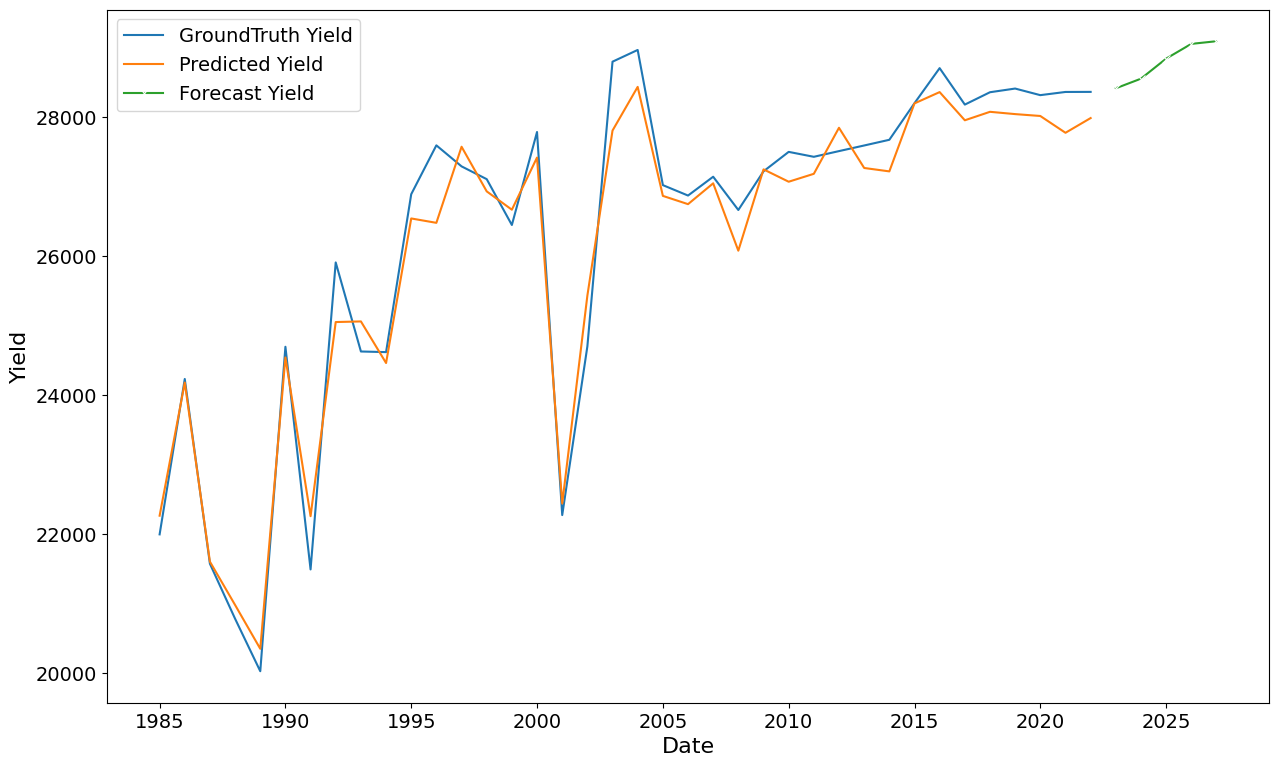

In [30]:
import matplotlib.pyplot as plt
date_range = pd.date_range(start='2022-12-31', periods=len(future_yields), freq='A-DEC')
date_range = date_range.date
print(date_range)

dataset = pd.read_csv("Monthly_dataset_1.csv")

new_data = pd.DataFrame({'date':date_range, 'Yield':future_yields})
existing_data =pd.DataFrame({'date':dataset['date'], 'Yield':dataset['Yield']})

appended_data = pd.concat([existing_data,new_data], ignore_index=True)

date_known = pd.to_datetime(dataset['date'][time_steps:])
y_predict = [int(i) for i in scaled_pred]
print(y_predict)
y_known = dataset['Yield'][time_steps:]
date_forecast = pd.to_datetime(date_range)
y_forecast = future_yields


# plt.figure(figsize=(15, 9))
# sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield",)  # Add markers to the GroundTruth line
# sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
# # sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
# plt.show()


plt.figure(figsize=(15, 9))
sns.lineplot(x=date_known, y=y_known, label="GroundTruth Yield")  # Add markers to the GroundTruth line
sns.lineplot(x=date_known, y=y_predict, label='Predicted Yield', markers='--')  # Add markers to the Predicted line
sns.lineplot(x=date_forecast, y=y_forecast, label="Forecast Yield", marker='x')  # Add markers to the Forecast line
plt.xlabel('Date', fontsize=16)  # Increase x-axis label font size
plt.ylabel('Yield', fontsize=16)  # Increase y-axis label font size
plt.xticks(fontsize=14)  # Increase x-axis tick label font size
plt.yticks(fontsize=14)  # Increase y-axis tick label font size
plt.legend(fontsize=14)  # Increase legend font size
# plt.grid()
plt.show()

In [43]:
model.save("Models/Final_model_overfit1.hdf5")
model.save_weights("Models/Final_modelWeights_overfit1.hdf5")

<Axes: xlabel='date', ylabel='Yield'>

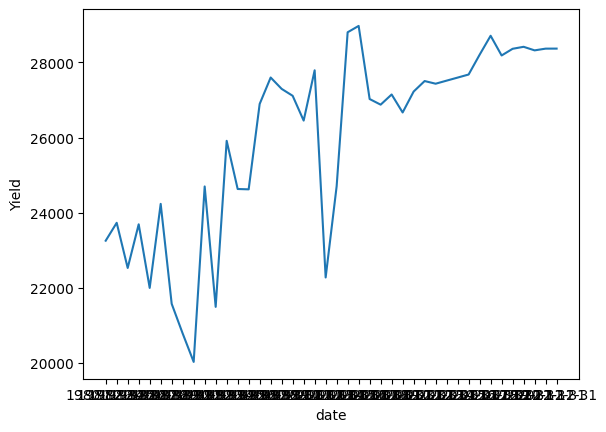

In [34]:
sns.lineplot(x=dataset['date'],y=dataset['Yield'])
sns.lineplot(x=dataset['date'])

In [45]:
y_pred_inv

array([[22264.877],
       [24181.28 ],
       [21602.451],
       [20979.691],
       [20347.088],
       [24543.734],
       [22257.006],
       [25053.893],
       [25062.703],
       [24463.096],
       [26545.938],
       [26482.592],
       [27578.736],
       [26935.984],
       [26671.254],
       [27422.293],
       [22439.686],
       [25434.828],
       [27811.793],
       [28440.223],
       [26870.531],
       [26751.973],
       [27051.385],
       [26081.072],
       [27252.164],
       [27074.287],
       [27188.58 ],
       [27851.857],
       [27272.006],
       [27223.605],
       [28202.348],
       [28365.354],
       [27959.195],
       [28081.072],
       [28048.469],
       [28021.027],
       [27779.906],
       [27991.707]], dtype=float32)

In [46]:
y_true_inv

array([[21995.],
       [24233.],
       [21572.],
       [20781.],
       [20024.],
       [24697.],
       [21490.],
       [25912.],
       [24629.],
       [24620.],
       [26894.],
       [27598.],
       [27295.],
       [27111.],
       [26451.],
       [27790.],
       [22273.],
       [24703.],
       [28803.],
       [28972.],
       [27025.],
       [26875.],
       [27146.],
       [26667.],
       [27224.],
       [27504.],
       [27433.],
       [27515.],
       [27596.],
       [27678.],
       [28205.],
       [28710.],
       [28185.],
       [28363.],
       [28416.],
       [28321.],
       [28367.],
       [28368.]])

In [47]:
date_known

4    1984-12-31
5    1985-12-31
6    1986-12-31
7    1987-12-31
8    1988-12-31
9    1989-12-31
10   1990-12-31
11   1991-12-31
12   1992-12-31
13   1993-12-31
14   1994-12-31
15   1995-12-31
16   1996-12-31
17   1997-12-31
18   1998-12-31
19   1999-12-31
20   2000-12-31
21   2001-12-31
22   2002-12-31
23   2003-12-31
24   2004-12-31
25   2005-12-31
26   2006-12-31
27   2007-12-31
28   2008-12-31
29   2009-12-31
30   2010-12-31
31   2011-12-31
32   2012-12-31
33   2013-12-31
34   2014-12-31
35   2015-12-31
36   2016-12-31
37   2017-12-31
38   2018-12-31
39   2019-12-31
40   2020-12-31
41   2021-12-31
Name: date, dtype: datetime64[ns]

In [51]:
datas = {'Date':list(date_known), 'Original Yield':list(y_true_inv[:,0]), 'Predicted Yield':list(y_pred_inv[:,0])}
dataframe = pd.DataFrame(datas)
dataframe

,Date,Original Yield,Predicted Yield
0,1984-12-31,21995.0,22264.876953
1,1985-12-31,24233.0,24181.279297
2,1986-12-31,21572.0,21602.451172
3,1987-12-31,20781.0,20979.691406
4,1988-12-31,20024.0,20347.087891
5,1989-12-31,24697.0,24543.734375
6,1990-12-31,21490.0,22257.005859
7,1991-12-31,25912.0,25053.892578
8,1992-12-31,24629.0,25062.703125
9,1993-12-31,24620.0,24463.095703


In [60]:

# Save the DataFrame to an Excel file
output_file = 'yield_predictions.xlsx'  # Change this to your desired file name
df.to_excel(output_file, index=False)

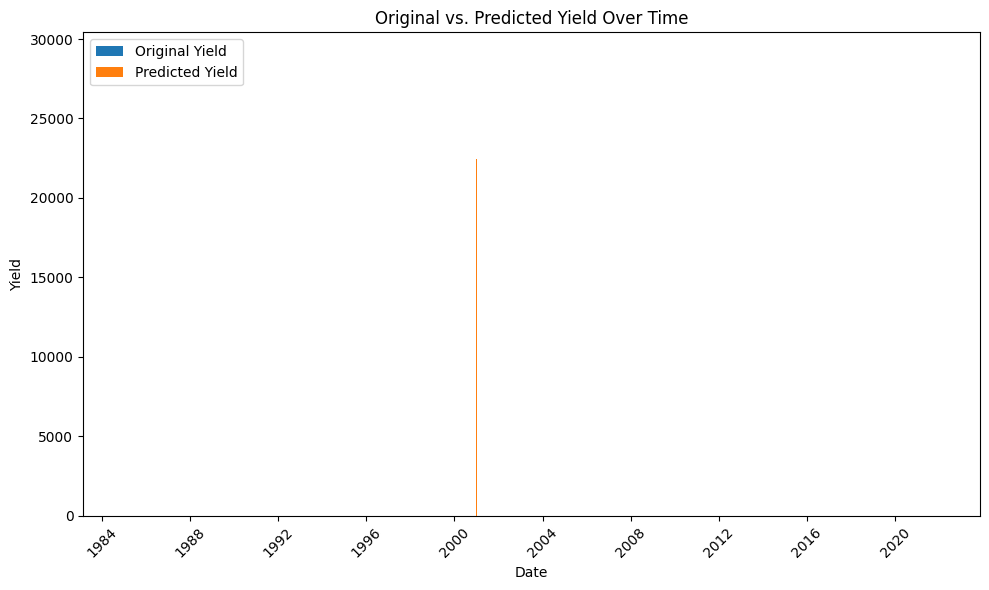

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = {
    'Date': ['1984-12-31', '1985-12-31', '1986-12-31', '1987-12-31', '1988-12-31', '1989-12-31', '1990-12-31', '1991-12-31', '1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31'],
    'Original Yield': [21995.0, 24233.0, 21572.0, 20781.0, 20024.0, 24697.0, 21490.0, 25912.0, 24629.0, 24620.0, 26894.0, 27598.0, 27295.0, 27111.0, 26451.0, 27790.0, 22273.0, 24703.0, 28803.0, 28972.0, 27025.0, 26875.0, 27146.0, 26667.0, 27224.0, 27504.0, 27433.0, 27515.0, 27596.0, 27678.0, 28205.0, 28710.0, 28185.0, 28363.0, 28416.0, 28321.0, 28367.0, 28368.0],
    'Predicted Yield': [22264.876953, 24181.279297, 21602.451172, 20979.691406, 20347.087891, 24543.734375, 22257.005859, 25053.892578, 25062.703125, 24463.095703, 26545.937500, 26482.591797, 27578.736328, 26935.984375, 26671.253906, 27422.292969, 22439.685547, 25434.828125, 27811.792969, 28440.222656, 26870.531250, 26751.972656, 27051.384766, 26081.072266, 27252.164062, 27074.287109, 27188.580078, 27851.857422, 27272.005859, 27223.605469, 28202.347656, 28365.353516, 27959.195312, 28081.072266, 28048.468750, 28021.027344, 27779.906250, 27991.707031]
}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Original Yield'], width=0.4, label='Original Yield')
plt.bar(df['Date'], df['Predicted Yield'], width=0.4, label='Predicted Yield')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.title('Original vs. Predicted Yield Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()